# Text Summarization

In this exercise, the dataset contains documents of BBC News articles related to business, entertainment, politics, sports and technology. Each document is comprised of several paragraphs that are separated by newline character ('\n'). Within each paragraph, you can have multiple sentences, which in turn have multiple words. You need to perform sentence-based tokenization and then vectorization on a text document before feeding it into a summarization function.

**NOTE:** It is best to use TF-IDF vectorization and sort sentences by their scores indicating the most valuable sentences for summarizing.

(data downloaded from https://www.kaggle.com/datasets/shivamkushwaha/bbc-full-text-document-classification)

In [1]:
import pandas as pd
import numpy as np

# For display
import textwrap

# For tokenization
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# For vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shmel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shmel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('data/bbc_text_cls.csv')

In [3]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


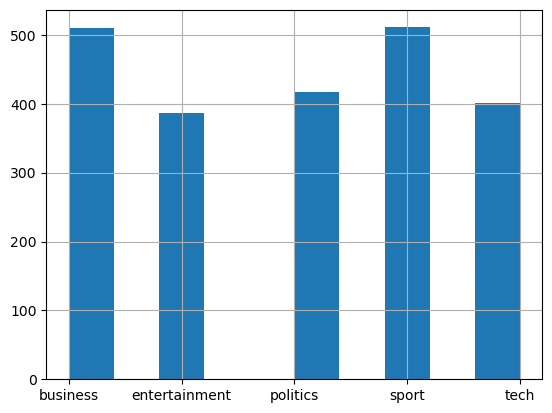

In [4]:
# Plot class distribution - fairly well-balanced dataset

df['labels'].hist();

In [6]:
df.shape

(2225, 2)

## View document examples

In [7]:
# View text example - split text at every '\n' into list

df.loc[1000, 'text'].split('\n')

["Muslim police stops 'more likely'",
 '',
 'UK Muslims should accept that people of Islamic appearance are more likely to be stopped and searched by police, a Home Office minister has said.',
 '',
 'Hazel Blears said innocent Muslims would be targeted because of the search for Islamic extremists. Qualifications for religious leaders to enter the UK could also be made tougher, she told a Commons inquiry. Her comments have been described as "irresponsible" and "outrageous" by the Islamic Human Rights Commission (IHRC).',
 '',
 '"The threat is most likely to come from those people associated with an extreme form of Islam, or who are falsely hiding behind Islam," the Salford MP told the Commons home affairs committee.',
 '',
 '"It means that some of our counter-terrorism powers will be disproportionately experienced by the Muslim community." It was a reality that should be recognised, she said. "If a threat is from a particular place then our action is going to be targeted at that area," 

**Note that every article starts with a heading or title (first-occurring single sentence ending with '\n')**

In [8]:
# Split text once only, at 1st-occuring '\n', so output is two strings in a list

df.loc[1000, 'text'].split('\n', 1)

["Muslim police stops 'more likely'",
 '\nUK Muslims should accept that people of Islamic appearance are more likely to be stopped and searched by police, a Home Office minister has said.\n\nHazel Blears said innocent Muslims would be targeted because of the search for Islamic extremists. Qualifications for religious leaders to enter the UK could also be made tougher, she told a Commons inquiry. Her comments have been described as "irresponsible" and "outrageous" by the Islamic Human Rights Commission (IHRC).\n\n"The threat is most likely to come from those people associated with an extreme form of Islam, or who are falsely hiding behind Islam," the Salford MP told the Commons home affairs committee.\n\n"It means that some of our counter-terrorism powers will be disproportionately experienced by the Muslim community." It was a reality that should be recognised, she said. "If a threat is from a particular place then our action is going to be targeted at that area," she added. On ministe

**By using `split()` function on a document, you can separate the text document into the title and the body, output in a list.**

You do this because it is only the body of the article that you want to process. You can use the article title at the end, to compare with the summary output to assess the extraction process.

In [10]:
# View article title (type of summary in itself)

df.loc[1000, 'text'].split('\n', 1)[0]

"Muslim police stops 'more likely'"

In [11]:
# View article body (for summarization)

df.loc[1000, 'text'].split('\n', 1)[1]

'\nUK Muslims should accept that people of Islamic appearance are more likely to be stopped and searched by police, a Home Office minister has said.\n\nHazel Blears said innocent Muslims would be targeted because of the search for Islamic extremists. Qualifications for religious leaders to enter the UK could also be made tougher, she told a Commons inquiry. Her comments have been described as "irresponsible" and "outrageous" by the Islamic Human Rights Commission (IHRC).\n\n"The threat is most likely to come from those people associated with an extreme form of Islam, or who are falsely hiding behind Islam," the Salford MP told the Commons home affairs committee.\n\n"It means that some of our counter-terrorism powers will be disproportionately experienced by the Muslim community." It was a reality that should be recognised, she said. "If a threat is from a particular place then our action is going to be targeted at that area," she added. On ministers of religions, such as imams, she sai

## 1) Obtain randomly-sampled document

In [12]:
# Obtain random business document

business_doc = df[df.labels == 'business']['text'].sample()

In [13]:
# Pandas Series

business_doc

179    Dollar drops on reserves concerns\n\nThe US do...
Name: text, dtype: object

In [14]:
# To access text use .iloc[0]

business_doc.iloc[0]

'Dollar drops on reserves concerns\n\nThe US dollar has dropped against major currencies on concerns that central banks may cut the amount of dollars they hold in their foreign reserves.\n\nComments by South Korea\'s central bank at the end of last week have sparked the recent round of dollar declines. South Korea, which has about $200bn in foreign reserves, said it plans instead to boost holdings of currencies such as the Australian and Canadian dollar. Analysts reckon that other nations may follow suit and now ditch the dollar. At 1300 GMT, the euro was up 0.9% on the day at 1.3187 euros per US dollar. The British pound had added 0.5% to break through the $1.90 level, while the dollar had fallen by 1.3% against the Japanese yen to trade at 104.16 yen.\n\nAt the start of the year, the US currency, which had lost 7% against the euro in the final three months of 2004 and had fallen to record lows, staged something of a recovery.\n\nAnalysts, however, pointed to the dollar\'s inability r

In [15]:
# Function to view full text wrapped beautifully - note that text must be input directly (not Series)

def wrap(x):
    return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

In [16]:
# Print wrapped text from business doc - use .iloc[0] on Series

print(wrap(business_doc.iloc[0]))

Dollar drops on reserves concerns

The US dollar has dropped against
major currencies on concerns that central banks may cut the amount of
dollars they hold in their foreign reserves.

Comments by South
Korea's central bank at the end of last week have sparked the recent
round of dollar declines.  South Korea, which has about $200bn in
foreign reserves, said it plans instead to boost holdings of
currencies such as the Australian and Canadian dollar.  Analysts
reckon that other nations may follow suit and now ditch the dollar.
At 1300 GMT, the euro was up 0.9% on the day at 1.3187 euros per US
dollar.  The British pound had added 0.5% to break through the $1.90
level, while the dollar had fallen by 1.3% against the Japanese yen to
trade at 104.16 yen.

At the start of the year, the US currency, which
had lost 7% against the euro in the final three months of 2004 and had
fallen to record lows, staged something of a recovery.

Analysts,
however, pointed to the dollar's inability recently 

## 2) Tokenize the document body into sentences

In [17]:
# Input article body to NLTK function (omit article title)

sentences = nltk.sent_tokenize(business_doc.iloc[0].split("\n", 1)[1])

In [18]:
sentences

['\nThe US dollar has dropped against major currencies on concerns that central banks may cut the amount of dollars they hold in their foreign reserves.',
 "Comments by South Korea's central bank at the end of last week have sparked the recent round of dollar declines.",
 'South Korea, which has about $200bn in foreign reserves, said it plans instead to boost holdings of currencies such as the Australian and Canadian dollar.',
 'Analysts reckon that other nations may follow suit and now ditch the dollar.',
 'At 1300 GMT, the euro was up 0.9% on the day at 1.3187 euros per US dollar.',
 'The British pound had added 0.5% to break through the $1.90 level, while the dollar had fallen by 1.3% against the Japanese yen to trade at 104.16 yen.',
 'At the start of the year, the US currency, which had lost 7% against the euro in the final three months of 2004 and had fallen to record lows, staged something of a recovery.',
 "Analysts, however, pointed to the dollar's inability recently to extend

## 3) Use TF-IDF Vectorizer to score each sentence

In [19]:
# Use TF-IDF vectorizer with stopwords removed and L1 regularization

featurizer = TfidfVectorizer(stop_words=stopwords.words('english'), norm='l1')

In [20]:
# Train vectorizer on sentences from business article & transform sentences to TF-IDF matrix

X = featurizer.fit_transform(sentences)

In [21]:
# Function to obtain average TF-IDF score from each row in sparse matrix

def get_sentence_score(tfidf_row):
    # Return average of non-zero values from vector representation of a sentence 
    x = tfidf_row[tfidf_row != 0] 
    
    return x.mean()

In [22]:
# Set up empty array for scoring each sentence
scores = np.zeros(len(sentences))

# Loop through sentences and add TF-IDF score using function above
for i in range(len(sentences)):
    score = get_sentence_score(X[i, :])
    scores[i] = score
    

# THESE TWO CODE BLOCKS CAN BE DONE IN ONE LINE USING LIST COMPREHENSION

In [23]:
# Array populated with TF-IDF scores for each sentence from business article

scores

array([0.06666667, 0.07692308, 0.07142857, 0.125     , 0.11111111,
       0.07692308, 0.0625    , 0.05263158, 0.1       , 0.06666667,
       0.07692308, 0.05882353, 0.07142857, 0.04347826])

In [24]:
len(scores)

14

In [25]:
# Obtain index numbers of sorted TF-IDF scores, in descending order

sort_idx = np.argsort(-scores)

In [26]:
sort_idx

array([ 3,  4,  8,  1,  5, 10,  2, 12,  0,  9,  6, 11,  7, 13],
      dtype=int64)

**There are many options for how to choose which sentences to include:**

* top N number of sentences
* top N number of words or characters.
* top X% of sentences or top X% of words
* sentences with scores > greater than the average score
* sentences with scores > greater than the factor * average score

**NOTE:** You also don't have to sort the output. Sometimes, it will make more sense in ascending order.

In this exercise, you will pick the top five sentences and print out the average TF-IDF score with the sentence:


In [27]:
print("Generated summary:\n")

for i in sort_idx[:5]:
    print(wrap("%.2f: %s" % (scores[i], sentences[i])))

Generated summary:

0.12: Analysts reckon that other nations may follow suit and now ditch
the dollar.
0.11: At 1300 GMT, the euro was up 0.9% on the day at 1.3187 euros per
US dollar.
0.10: The focus once again has been on the country's massive trade and
budget deficits, with predictions of more dollar weakness to come.
0.08: Comments by South Korea's central bank at the end of last week
have sparked the recent round of dollar declines.
0.08: The British pound had added 0.5% to break through the $1.90
level, while the dollar had fallen by 1.3% against the Japanese yen to
trade at 104.16 yen.


In [32]:
# You may want to see the sentences in the order in which they were originally printed

sort_idx[:5]

array([3, 4, 8, 1, 5], dtype=int64)

In [28]:
# Obtain article title to compare

business_doc.iloc[0].split("\n", 1)[0]

'Dollar drops on reserves concerns'

In [30]:
# Obtain original body to compare

print(wrap(business_doc.iloc[0].split("\n", 1)[1]))


The US dollar has dropped against major currencies on concerns that
central banks may cut the amount of dollars they hold in their foreign
reserves.

Comments by South Korea's central bank at the end of last
week have sparked the recent round of dollar declines.  South Korea,
which has about $200bn in foreign reserves, said it plans instead to
boost holdings of currencies such as the Australian and Canadian
dollar.  Analysts reckon that other nations may follow suit and now
ditch the dollar.  At 1300 GMT, the euro was up 0.9% on the day at
1.3187 euros per US dollar.  The British pound had added 0.5% to break
through the $1.90 level, while the dollar had fallen by 1.3% against
the Japanese yen to trade at 104.16 yen.

At the start of the year,
the US currency, which had lost 7% against the euro in the final three
months of 2004 and had fallen to record lows, staged something of a
recovery.

Analysts, however, pointed to the dollar's inability
recently to extend that rally despite posi

# Create function to summarize document

In [33]:
# Function to summarize artice

def summarize(text):
    # Extract sentences by tokenization
    sents = nltk.sent_tokenize(text)
    
    # Perform TF-IDF vectorization 
    X = featurizer.fit_transform(sents)
    
    # Compute scores for each sentence
    scores = np.zeros(len(sents))
    for i in range(len(sents)):
        score = get_sentence_score(X[i,:])
        scores[i] = score
        
    # Sort the scores
    sort_idx = np.argsort(-scores)
    
    # Print summary
    for i in sort_idx[:5]:
        print(wrap("%.2f: %s" % (scores[i], sents[i])))

In [39]:
# Obtain random entertainment article

doc = df[df.labels == 'entertainment']['text'].sample()

In [40]:
# Summarize the entertainment article body

summarize(doc.iloc[0].split("\n", 1)[1])

0.25: If this isn't one of the films of the year, I don't know what
is."
0.10: The awards, which were hosted by Jack Dee, are to be screened on
ITV London on Tuesday at 2300 GMT.
0.09: Other winners included Paddy Considine, who was crowned best
actor for his role in Dead Man's Shoes.
0.08: Pawlikowski won the best screenplay statuette, while Roger
Deakins won the Technical Achievement Award for his cinematography on
The Village and The Ladykillers.
0.08: Simon Pegg, who stars in and co-wrote Shaun of the Dead, won the
2004 Peter Sellers Award For Comedy.


In [41]:
# Title for random entertainment article

doc.iloc[0].split("\n", 1)[0]

'Vera Drake scoops film award'

In [42]:
# Body of original random entertainment article

print(wrap(doc.iloc[0].split("\n", 1)[1]))


Oscar hopefuls Mike Leigh and Imelda Staunton were both winners at
the 2004 Evening Standard British Film Awards.

Vera Drake - Leigh's
1950s drama about a backstreet abortionist - was named best film and
Staunton, who played the title role, was named best actress.  Other
winners included Paddy Considine, who was crowned best actor for his
role in Dead Man's Shoes.  Bridget Jones: The Edge of Reason was named
Evening Standard Readers' Film of 2004 at the central London ceremony.
Leigh was presented with his winner's statuette by Timothy Spall and
Staunton's award was announced by Patrick Stewart, during the
glittering ceremony at The Savoy on Sunday night.  Evening Standard
film critic Derek Malcolm said: "He [Leigh] has never made a film that
is better controlled and technically more secure... If this isn't one
of the films of the year, I don't know what is."  The Alexander Walker
Special Award - which honours those who have made a supreme
contribution to British film - went to Tim B

#### Based on your own understanding, how well is the document summarized?